# Decision Tree Learning: College Admission

A decision tree a learned set of rules that allows us to make decisions on data.

## Step 1: Load the Data

In [25]:
import os
import urllib.request

data_location = "../data/college-admissions/admission-data.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/college-admissions/admission-data.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)


data_location: admission-data.csv


In [26]:
import pandas as pd

dataset = pd.read_csv(data_location)
dataset

admit  gre   gpa  rank
0       0  380  3.61     3
1       1  660  3.67     3
2       1  800  4.00     1
3       0  640  3.19     4
4       0  520  2.93     4
..    ...  ...   ...   ...
95      0  660  3.33     2
96      0  640  3.52     4
97      0  480  3.57     2
98      0  700  2.88     2
99      0  400  3.31     3

[100 rows x 4 columns]

## Step 2 : Basic Analysis

### 2.1 Look at data split by 'admit' colunm
Looks like a resaonble distribution

In [27]:
## TODO : group by 'admit' column
dataset.groupby('admit').size()

admit
0    57
1    43
dtype: int64

### 2.2 Summary of data
use 'describe' function

In [28]:
## TODO : use 'describe'
dataset.describe()

admit         gre         gpa        rank
count  100.00000  100.000000  100.000000  100.000000
mean     0.43000  600.000000    3.390700    2.520000
std      0.49757  124.462481    0.397188    1.019804
min      0.00000  300.000000    2.420000    1.000000
25%      0.00000  520.000000    3.127500    2.000000
50%      0.00000  600.000000    3.350000    2.000000
75%      1.00000  700.000000    3.675000    3.000000
max      1.00000  800.000000    4.000000    4.000000

## Step 3: Build feature vectors

In [29]:
## TODO : 
## input feature vector is  :  'gre', 'gpa', 'rank'
input_columns = ['gre', 'gpa', 'rank']
x = dataset[input_columns]

## TODO : label vector is 'admit'
y = dataset['admit']

print ('x : ', x.shape)
print ('y : ', y.shape)

x :  (100, 3)
y :  (100,)


## Step 4: Split Data into training and test.

We will split our the data up into training and test.  (You know the drill by now).

In [30]:
## TODO: Use training / test split of 80%/20%

from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,  test_size=0.2)
## to control train/test split set random_state to a number
# x_train,x_test,y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

print ("x_train :" , x_train.shape )
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (80, 3)
x_test : (20, 3)
y_train : (80,)
y_test : (20,)


## Step 5: Decision Tree

In [31]:
## TODO : Create a DecisionTree model 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

## TODO : train on (x_train, y_train)
model = dt.fit(x_train, y_train)
model

DecisionTreeClassifier()

### Visualize the tree

Must have graphviz installed

```console
$ brew install graphviz #Mac
$ sudo apt-get install graphviz #ubuntu
```
Windows Users: https://graphviz.gitlab.io/download/


In [32]:
from sklearn import tree
from six import StringIO
import pydot 

dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png('tree.png')

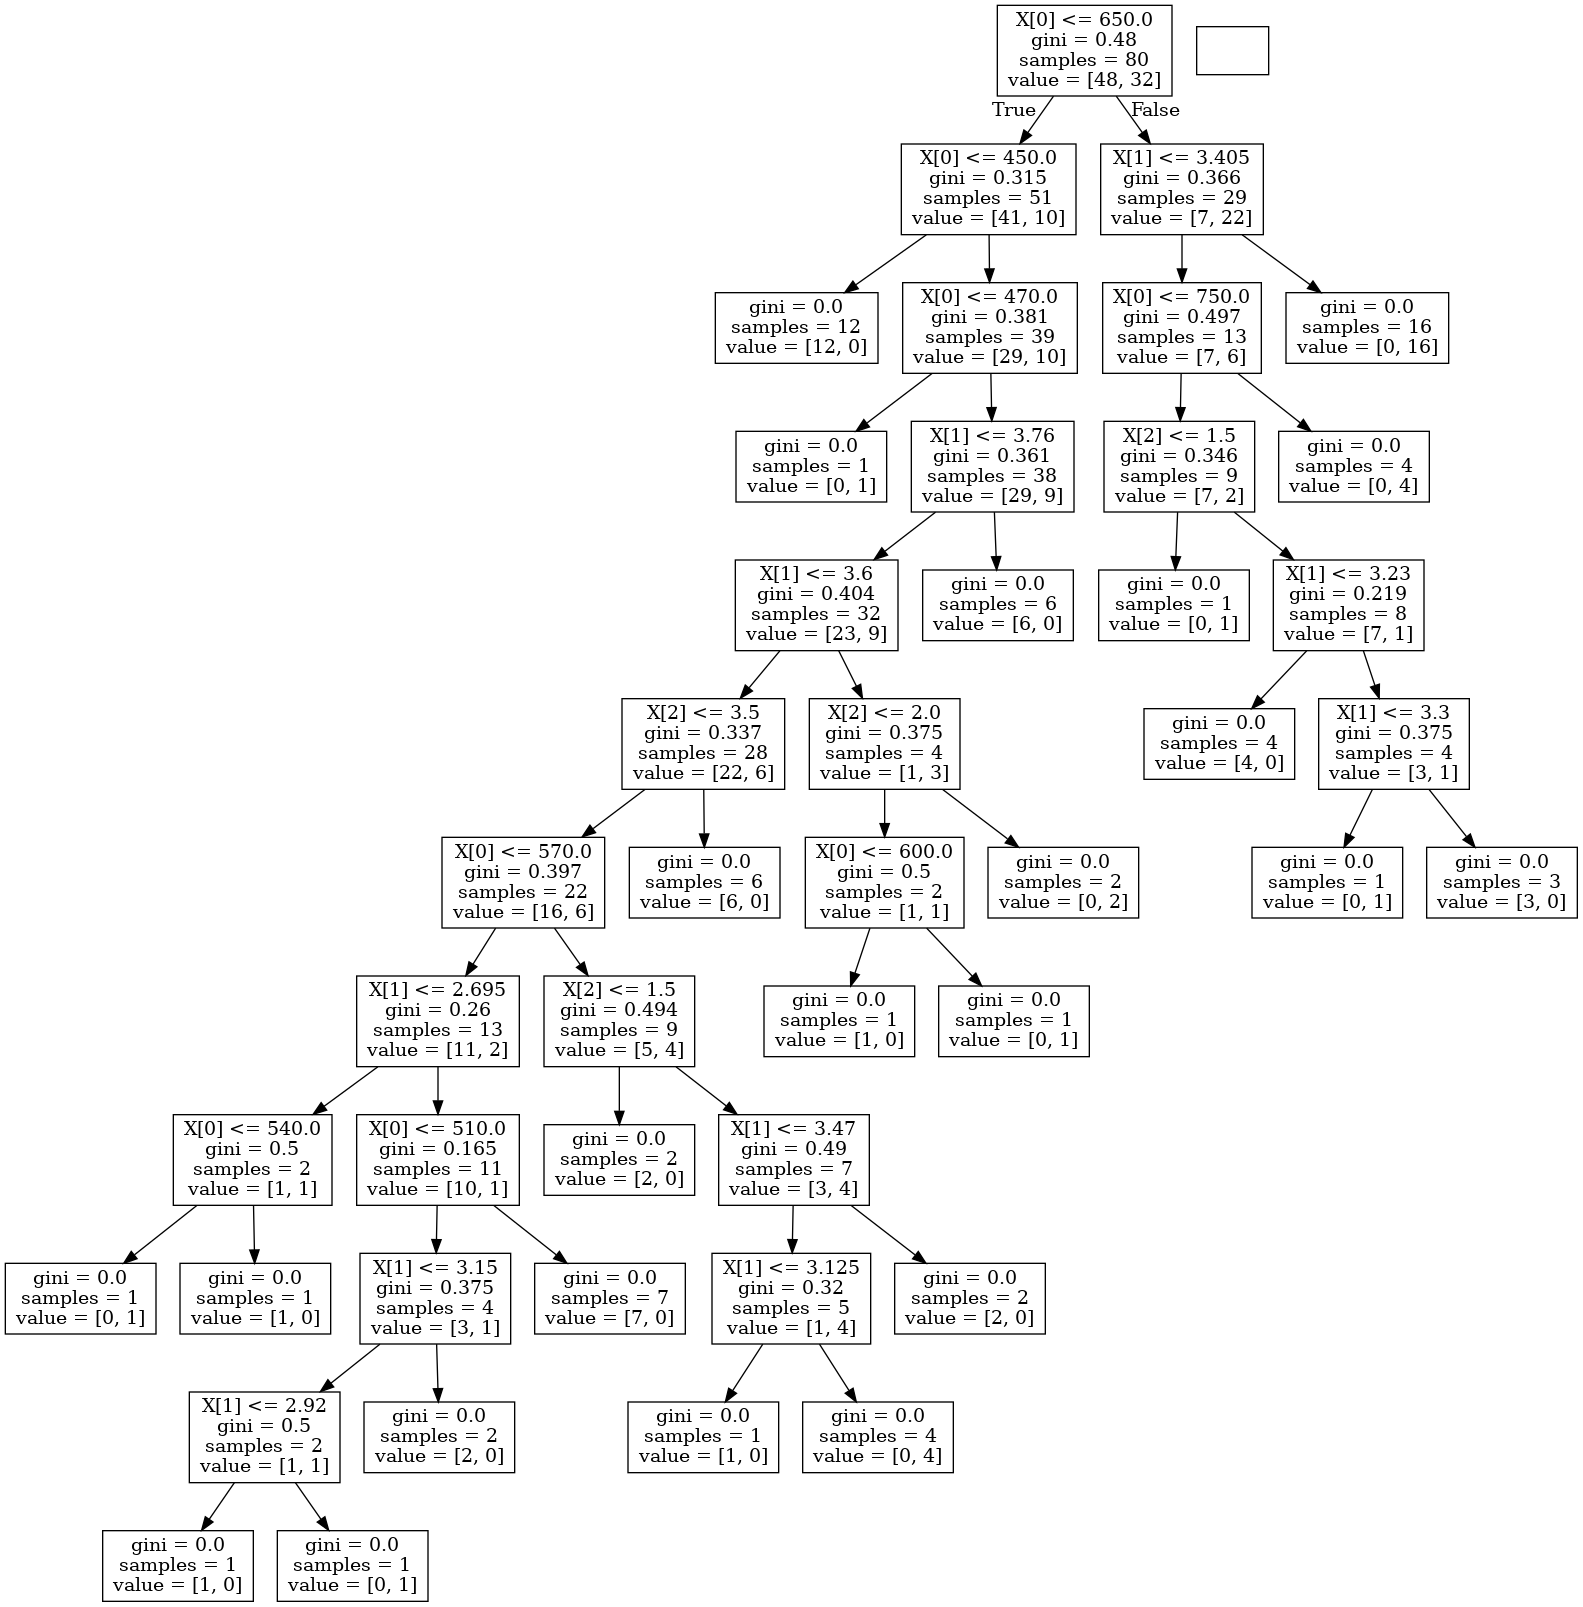

In [33]:
# View the Image
from IPython.display import Image
Image("tree.png")

## Step 6 : Get Predictions on Test

In [34]:
## TODO : Get predictions on test data
## Hint : 'test' set name
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [35]:
import pandas as pd

a = pd.DataFrame({'label' : y_test, 'prediction': y_pred})
a

label  prediction
18      1           1
4       0           0
13      1           0
15      0           0
79      1           0
49      0           0
7       0           0
97      0           0
92      1           1
29      0           0
93      0           0
86      0           1
9       1           1
66      1           1
74      1           1
3       0           0
42      1           1
16      1           1
10      1           1
84      1           0

## Step 7: Evaluate the model.

Let us check to see how the model did, using accuracy as a measure.

### 7.1 Model Accuracy

In [36]:
train_accuracy = model.score(x_train,y_train)
## TODO : score with (x_test, y_test)
test_accuracy = model.score(x_test, y_test)

print ("Train accuracy: ", train_accuracy)
print ("Test accuracy: ", test_accuracy)

Train accuracy:  1.0
Test accuracy:  0.8


In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8

### 7.2 Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[8, 1],
       [3, 8]])

[]

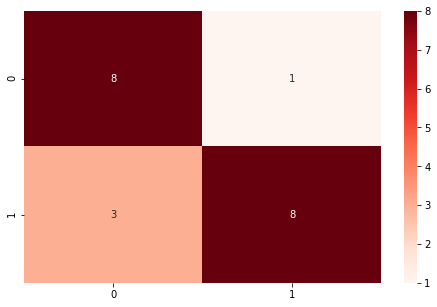

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

## Step 8 Feature Importances

How important were our features?

check out model.feature_importances_

What can you conclude?



In [40]:
model.feature_importances_

array([0.53670027, 0.37011528, 0.09318445])

In [41]:
feature_importantance_df = pd.DataFrame({'feature' : input_columns, 'importantance' : model.feature_importances_})

feature_importantance_df.sort_values(['importantance'], ascending=False)

feature  importantance
0     gre       0.536700
1     gpa       0.370115
2    rank       0.093184

## Step 9: Do a Few Runs
- Click 'Cell --> Run All'
- Observe how the 'accuracy' output changes above
- Why?  Can we get the same accuracy all the times?

To get 'consistant' split for testing and random data you can set the seed variable random_state
   
```python
x_train,x_test,y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

```

## Step-10: Hyper Parameter Tuning

Let's use crossvalidation to get the best parameters for the tree!



In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs =-1,
                           verbose = 2)

In [43]:
%%time

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    1.1s


[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=random, total=   0.0s
[CV] criterio

[Parallel(n_jobs=-1)]: Done 8016 tasks      | elapsed:    4.3s


ax_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=8, splitter=random 
[CV]  criterion=gini

[Parallel(n_jobs=-1)]: Done 26128 tasks      | elapsed:   11.0s


=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, 

[Parallel(n_jobs=-1)]: Done 42936 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 43200 out of 43200 | elapsed:   16.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=2)

## Create the Best Tree

In [44]:
# Find the best params
print("best parameters", grid_search.best_params_)
print("best score: ", grid_search.best_score_)

best parameters {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'random'}
best score:  0.85


In [45]:
#  Use the best params
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'], 
                            max_depth = grid_search.best_params_['max_depth'],  
                            min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                            min_samples_split = grid_search.best_params_['min_samples_split'], 
                            splitter = grid_search.best_params_['splitter'])

model = dt.fit(x_train, y_train)

print ("Train accuracy: ", model.score(x_train,y_train))
print ("Test accuracy: ", model.score(x_test, y_test))

Train accuracy:  0.8875
Test accuracy:  0.6


[[8 1]
 [3 8]]


[]

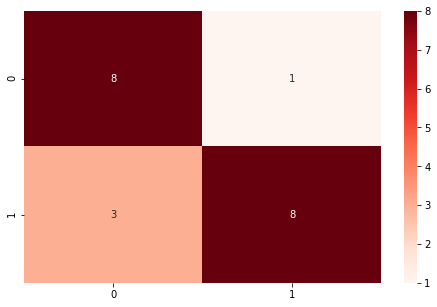

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=random 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=random 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=random 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=random 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=4, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_s

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print (cm)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()